# Training Data Visualization 

In [1]:
# Importing packages 
from os import path

import pandas as pd

import numpy as np 

from openpyxl import load_workbook

import csv

import sys
sys.path.append("../..")
from DexterousManipulation.training.data_loader import load_filtered_sequences, load_data_two_classes_seq

In [9]:
# All folders 
basepath = path.abspath('')
# folder_name = path.abspath(path.join(basepath, "..", "Figures/Training/2_Boxes_Custom_Loop_Tensors_Custom_Deep_Sets"))
# folder_name = path.abspath(path.join(basepath, "..", "Figures/Training/2_Similar_Boxes_Custom_Loop_Tensors_Custom_Deep_Sets"))

folder_1_diff = path.abspath(path.join(basepath, "..", "Figures/Training/Final_Data_Set/Different_Boxes_Classification_1_Grasp"))
folder_2_diff = path.abspath(path.join(basepath, "..", "Figures/Training/Final_Data_Set/Different_Boxes_Classification_2_Grasps")) 
folder_5_diff = path.abspath(path.join(basepath, "..", "Figures/Training/Final_Data_Set/Different_Boxes_Classification_5_Grasps")) 
folder_10_diff = path.abspath(path.join(basepath, "..", "Figures/Training/Final_Data_Set/Different_Boxes_Classification_10_Grasps")) 

folder_1_simi = path.abspath(path.join(basepath, "..", "Figures/Training/Final_Data_Set/Similar_Boxes_Classification_1_Grasp"))
folder_2_simi = path.abspath(path.join(basepath, "..", "Figures/Training/Final_Data_Set/Similar_Boxes_Classification_2_Grasps"))
folder_5_simi = path.abspath(path.join(basepath, "..", "Figures/Training/Final_Data_Set/Similar_Boxes_Classification_5_Grasps"))
folder_10_simi = path.abspath(path.join(basepath, "..", "Figures/Training/Final_Data_Set/Similar_Boxes_Classification_10_Grasps"))

#
folder_5_average = path.abspath(path.join(basepath, "..", "Figures/Training/Final_Data_Set/Similar_Boxes_Classification_5_Grasps"))

# Cylindre 
folder_5_cyli = path.abspath(path.join(basepath, "..", "Figures/Training/Final_Data_Set/Box_and_Cyli_5_Grasps"))

In [10]:
# Declaring data 
epochs_1_diff = [] 
training_losses_1_diff = [] 
validation_losses_1_diff = []
training_accs_1_diff = [] 
validation_accs_1_diff = [] 

epochs_2_diff = [] 
training_losses_2_diff = [] 
validation_losses_2_diff = []
training_accs_2_diff = [] 
validation_accs_2_diff = [] 

epochs_5_diff = [] 
training_losses_5_diff = [] 
validation_losses_5_diff = []
training_accs_5_diff = [] 
validation_accs_5_diff = [] 

epochs_10_diff = [] 
training_losses_10_diff = [] 
validation_losses_10_diff = []
training_accs_10_diff = [] 
validation_accs_10_diff = [] 

epochs_1_simi  = [] 
training_losses_1_simi  = [] 
validation_losses_1_simi  = []
training_accs_1_simi  = [] 
validation_accs_1_simi  = [] 

epochs_2_simi  = [] 
training_losses_2_simi = [] 
validation_losses_2_simi = []
training_accs_2_simi = [] 
validation_accs_2_simi = [] 

epochs_5_simi = [] 
training_losses_5_simi = [] 
validation_losses_5_simi = []
training_accs_5_simi = [] 
validation_accs_5_simi = [] 

epochs_10_simi = [] 
training_losses_10_simi = [] 
validation_losses_10_simi = []
training_accs_10_simi = [] 
validation_accs_10_simi = [] 

#
epochs_5_average = [] 
training_losses_5_average = [] 
validation_losses_5_average = []
training_accs_5_average = [] 
validation_accs_5_average = [] 

epochs_5_cyli = [] 
training_losses_5_cyli = [] 
validation_losses_5_cyli = []
training_accs_5_cyli = [] 
validation_accs_5_cyli = [] 

In [11]:
# Loading the data for 1 grasp 

# Function for loading from a csv file 
def load_from_csv(folder_str, file_str): 
    ep = [] 
    metric = []
    with open(folder_str + file_str, 'r') as file:
        reader = csv.reader(file)
        skip_first = True 
        for row in reader:
            if skip_first: 
                skip_first = False 
            else: 
                ep.append(int(row[1]))
                metric.append(float(row[2]))
                
    return ep, metric 

epochs_1_diff, training_accs_1_diff = load_from_csv(folder_1_diff, "/train_acc_1000_ep.csv")
_, training_losses_1_diff = load_from_csv(folder_1_diff, "/train_loss_1000_ep.csv")
_, validation_accs_1_diff = load_from_csv(folder_1_diff, "/val_acc_1000_ep.csv")
_, validation_losses_1_diff = load_from_csv(folder_1_diff, "/val_loss_1000_ep.csv")

# Mutiplying accs by 100 for comparability 
for index in range(len(validation_accs_1_diff)): 
    validation_accs_1_diff[index] = validation_accs_1_diff[index] * 100 
    
for index in range(len(training_accs_1_diff)): 
    training_accs_1_diff[index] = training_accs_1_diff[index] * 100 

            
# Fetching for similar objects 

epochs_1_simi, training_accs_1_simi = load_from_csv(folder_1_simi, "/train_acc_1000_ep.csv")
_, training_losses_1_simi = load_from_csv(folder_1_simi, "/train_loss_1000_ep.csv")
_, validation_accs_1_simi = load_from_csv(folder_1_simi, "/val_acc_1000_ep.csv")
_, validation_losses_1_simi = load_from_csv(folder_1_simi, "/val_loss_1000_ep.csv")       

# Mutiplying accs by 100 for comparability 
for index in range(len(training_accs_1_simi)): 
    training_accs_1_simi[index] = training_accs_1_simi[index] * 100 
    
for index in range(len(validation_accs_1_simi)): 
    validation_accs_1_simi[index] = validation_accs_1_simi[index] * 100 

In [12]:
# Load the data for different objects 
 
data_2_diff = load_workbook(folder_2_diff + '/Log_loss_acc_training_1_nb_epochs_1000.xlsx')
data_5_diff = load_workbook(folder_5_diff + '/Log_loss_acc_training_1_nb_epochs_1000.xlsx')
data_10_diff = load_workbook(folder_10_diff + '/Log_loss_acc_training_1_nb_epochs_1000.xlsx')

data_2_simi = load_workbook(folder_2_simi + '/Log_loss_acc_training_22_nb_epochs_1000.xlsx')
data_5_simi = load_workbook(folder_5_simi + '/Log_loss_acc_training_25_nb_epochs_1000.xlsx')
data_10_simi = load_workbook(folder_10_simi + '/Log_loss_acc_training_25_nb_epochs_1000.xlsx')

data_sheet_2_diff = data_2_diff.active
data_sheet_5_diff = data_5_diff.active
data_sheet_10_diff = data_10_diff.active

data_sheet_2_simi = data_2_simi.active
data_sheet_5_simi = data_5_simi.active
data_sheet_10_simi = data_10_simi.active

# 
data_5_average = load_workbook(folder_5_average + '/Log_loss_acc_training_99_nb_epochs_500_AVERAGE.xlsx')
data_sheet_5_average = data_5_average.active


data_5_cyli = load_workbook(folder_5_cyli + '/Log_loss_acc_training_1_nb_epochs_100.xlsx')
data_sheet_5_cyli = data_5_cyli.active

In [13]:
# Fetching the data for mutiple grasps 

# Function for loading from a csv file 
def load_from_xlsx(data_sheet): 
    epochs = [] 
    training_losses = [] 
    validation_losses = [] 
    training_accs = [] 
    validation_accs = [] 
    line_counter = 2
    while data_sheet.cell(line_counter, 1).value !=  None: 
        epochs.append(int(data_sheet.cell(line_counter, 1).value))
        training_losses.append(float(data_sheet.cell(line_counter, 2).value))
        validation_losses.append(float(data_sheet.cell(line_counter, 3).value))
        training_accs.append(float(data_sheet.cell(line_counter, 4).value)*100)
        validation_accs.append(float(data_sheet.cell(line_counter, 5).value)*100)
        line_counter += 1 
    
    return epochs, training_losses, validation_losses, training_accs, validation_accs 

epochs_2_diff, training_losses_2_diff, validation_losses_2_diff, training_accs_2_diff, validation_accs_2_diff = load_from_xlsx(data_sheet_2_diff)
epochs_5_diff, training_losses_5_diff, validation_losses_5_diff, training_accs_5_diff, validation_accs_5_diff = load_from_xlsx(data_sheet_5_diff)
epochs_10_diff, training_losses_10_diff, validation_losses_10_diff, training_accs_10_diff, validation_accs_10_diff = load_from_xlsx(data_sheet_10_diff)

epochs_2_simi, training_losses_2_simi, validation_losses_2_simi, training_accs_2_simi, validation_accs_2_simi = load_from_xlsx(data_sheet_2_simi)
epochs_5_simi, training_losses_5_simi, validation_losses_5_simi, training_accs_5_simi, validation_accs_5_simi = load_from_xlsx(data_sheet_5_simi)
epochs_10_simi, training_losses_10_simi, validation_losses_10_simi, training_accs_10_simi, validation_accs_10_simi = load_from_xlsx(data_sheet_10_simi)


#
epochs_5_average, training_losses_5_average, validation_losses_5_average, training_accs_5_average, validation_accs_5_average = load_from_xlsx(data_sheet_5_average)

epochs_5_cyli, training_losses_5_cyli, validation_losses_5_cyli, training_accs_5_cyli, validation_accs_5_cyli = load_from_xlsx(data_sheet_5_cyli)

## Plotting the data 

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")


In [15]:
import seaborn as sns
sns.set()

In [16]:
def plot_losses(epochs, training_losses, validation_losses, folder_name, title): 
    # Plotting the losses 
    plt.figure(figsize=(12, 6), dpi=80)
    plt.plot(epochs, training_losses, label = "training loss")
    plt.plot(epochs, validation_losses, label = "validation loss")
    plt.xlabel("Epoch")
    plt.ylabel("Categorical Crossentropy")
    plt.title(title)
    plt.legend(loc='upper right')
    plt.savefig(folder_name + "/training_validation_losses_plot_" + str(len(epochs)) + "_epochs.png")
    plt.show()

In [17]:
def plot_accuracies(epochs, training_accs, validation_loss, folder_name, title):
    # Plotting the accuracies  
    plt.figure(figsize=(12, 6), dpi=80)
    plt.plot(epochs, training_accs, label = "training accuracy")
    plt.plot(epochs, validation_loss, label = "validation accuracy")
    plt.xlabel("Epoch")
    plt.ylabel("Categorical accuracy")
    plt.title(title)
    plt.legend(loc='lower right')
    plt.savefig(folder_name + "/training_validation_accuracies_plot_" + str(len(epochs)) + "_epochs.png")
    plt.show()

# Different objects

### 1 Grasp

Training and validation loss on different objects, 1 Grasp, 1000 epochs


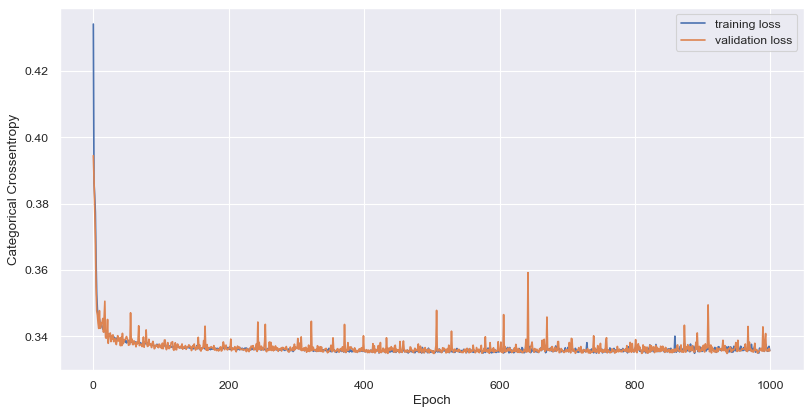

Training and validation accuracy on different objects, 1 Grasp, 1000 epochs


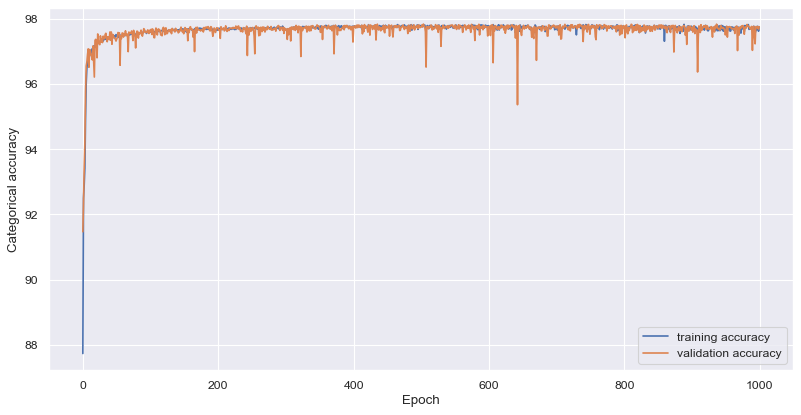

Highest validation accuracy achieved:  97.8410542011261


In [18]:
print("Training and validation loss on different objects, 1 Grasp, 1000 epochs")
plot_losses(epochs_1_diff, training_losses_1_diff, validation_losses_1_diff, folder_1_diff, "")
print("Training and validation accuracy on different objects, 1 Grasp, 1000 epochs")
plot_accuracies(epochs_1_diff, training_accs_1_diff, validation_accs_1_diff, folder_1_diff, "")
print("Highest validation accuracy achieved: ", max(validation_accs_1_diff))

### 2 Grasps

Training and validation loss on different objects, 2 Grasps, 1000 epochs


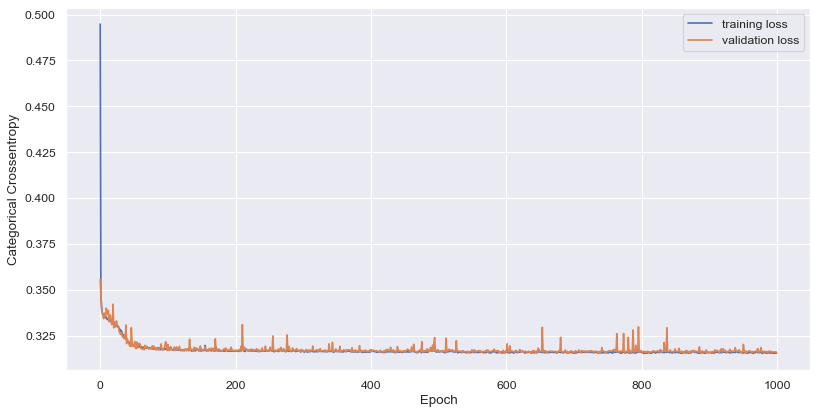

Training and validation accuracy on different objects, 2 Grasps, 1000 epochs


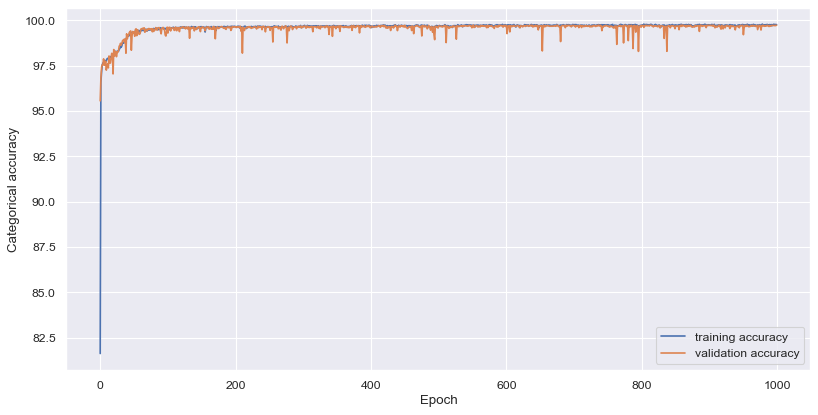

Highest validation accuracy achieved:  99.73992197659298


In [18]:
print("Training and validation loss on different objects, 2 Grasps, 1000 epochs")
plot_losses(epochs_2_diff, training_losses_2_diff, validation_losses_2_diff, folder_2_diff, "")
print("Training and validation accuracy on different objects, 2 Grasps, 1000 epochs")
plot_accuracies(epochs_2_diff, training_accs_2_diff, validation_accs_2_diff, folder_2_diff, "")
print("Highest validation accuracy achieved: ", max(validation_accs_2_diff))

### 5 Grasps

Training and validation loss on different objects, 5 Grasps, 1000 epochs


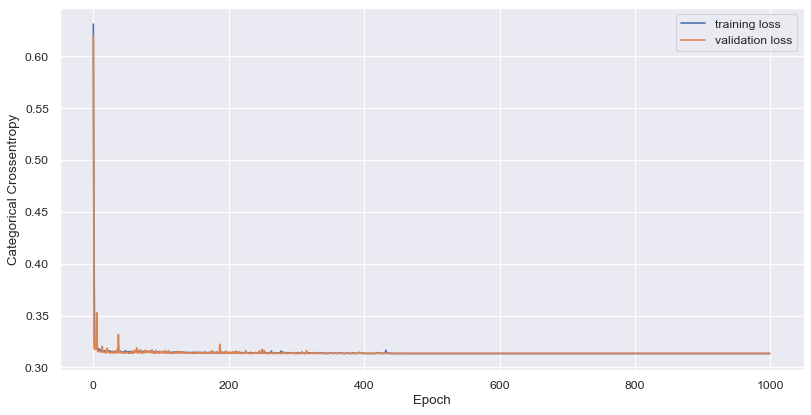

Training and validation accuracy on different objects, 5 Grasps, 1000 epochs


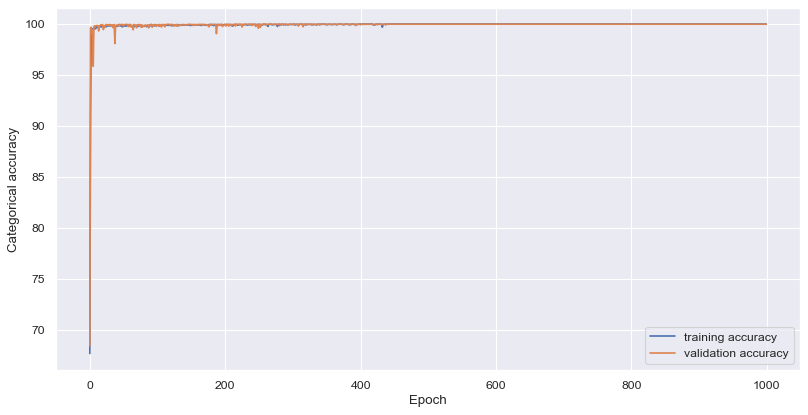

Highest validation accuracy achieved:  99.98645445309855


In [19]:
print("Training and validation loss on different objects, 5 Grasps, 1000 epochs")
plot_losses(epochs_5_diff, training_losses_5_diff, validation_losses_5_diff, folder_5_diff, "")
print("Training and validation accuracy on different objects, 5 Grasps, 1000 epochs")
plot_accuracies(epochs_5_diff, training_accs_5_diff, validation_accs_5_diff, folder_5_diff, "")
print("Highest validation accuracy achieved: ", max(validation_accs_5_diff))

### 10 Grasps

Training and validation loss on different objects, 10 Grasps, 1000 epochs


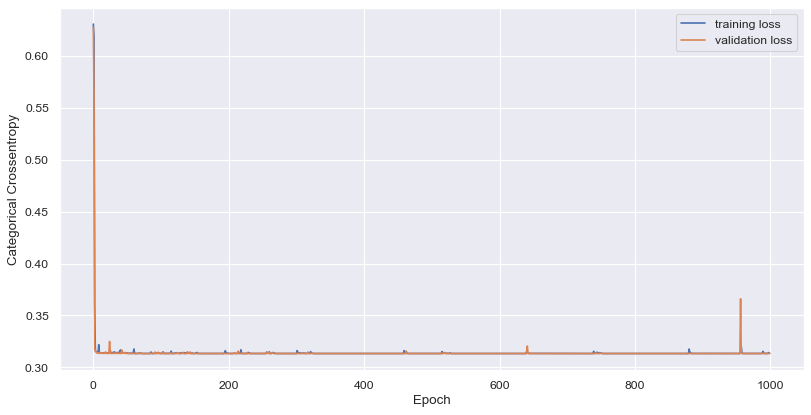

Training and validation accuracy on different objects, 10 Grasps, 1000 epochs


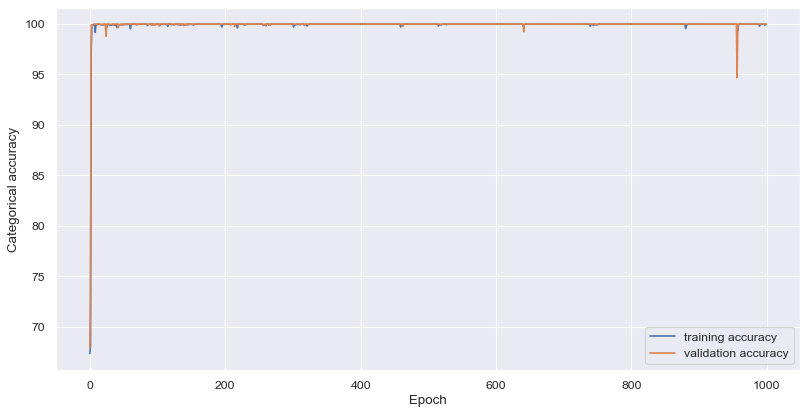

Highest validation accuracy achieved:  100.0


In [20]:
print("Training and validation loss on different objects, 10 Grasps, 1000 epochs")
plot_losses(epochs_10_diff, training_losses_10_diff, validation_losses_10_diff, folder_10_diff, "")
print("Training and validation accuracy on different objects, 10 Grasps, 1000 epochs")
plot_accuracies(epochs_10_diff, training_accs_10_diff, validation_accs_10_diff, folder_10_diff, "")
print("Highest validation accuracy achieved: ", max(validation_accs_10_diff))

Training and validation loss on cylindre vs big cube, 5 Grasps, 1000 epochs


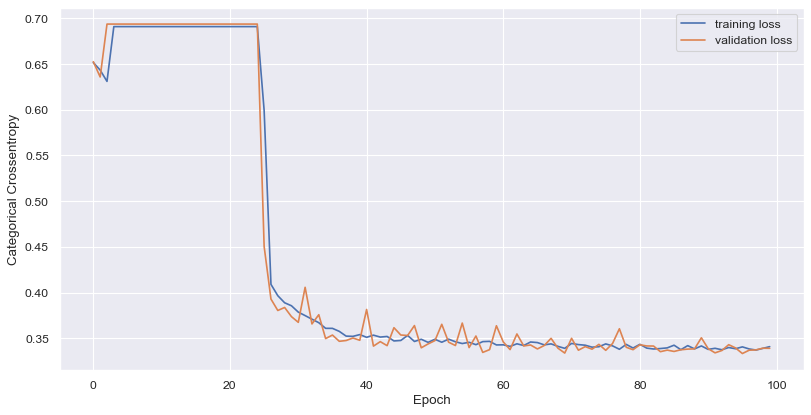

Training and validation accuracy on cylindre vs big cube, 5 Grasps, 1000 epochs


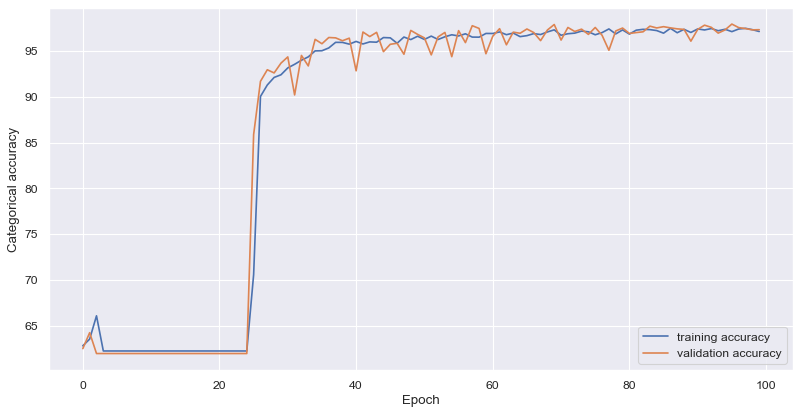

Highest validation accuracy achieved:  97.93900737492525


In [20]:
# Cylindre 
print("Training and validation loss on cylindre vs big cube, 5 Grasps, 1000 epochs")
plot_losses(epochs_5_cyli, training_losses_5_cyli, validation_losses_5_cyli, folder_5_cyli, "")
print("Training and validation accuracy on cylindre vs big cube, 5 Grasps, 1000 epochs")
plot_accuracies(epochs_5_cyli, training_accs_5_cyli, validation_accs_5_cyli, folder_5_cyli, "")
print("Highest validation accuracy achieved: ", max(validation_accs_5_cyli))

# Similar objects 

### 1 Grasp

Training and validation loss on similar objects, 1 Grasp, 1000 epochs


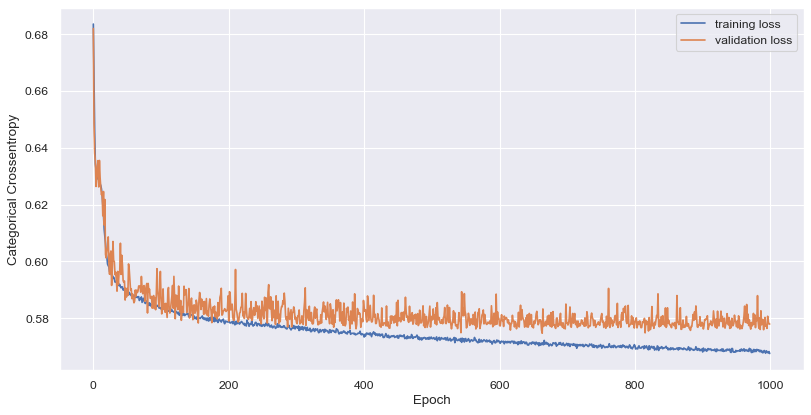

Training and validation accuracy on similar objects, 1 Grasp, 1000 epochs


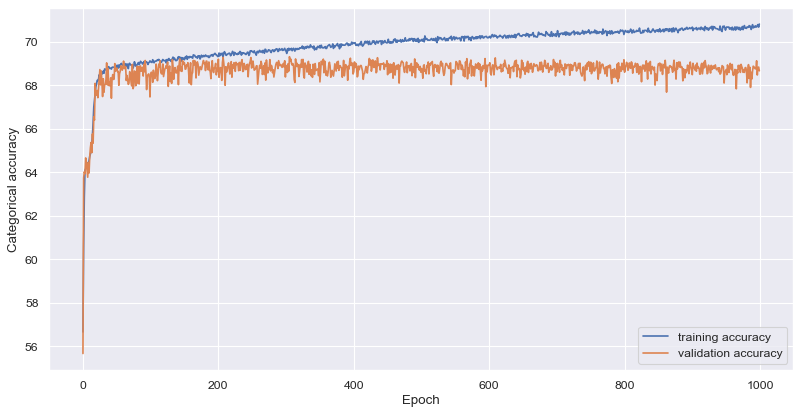

Highest validation accuracy achieved:  69.3188488483429


In [21]:
print("Training and validation loss on similar objects, 1 Grasp, 1000 epochs")
plot_losses(epochs_1_simi, training_losses_1_simi, validation_losses_1_simi, folder_1_simi, "")
print("Training and validation accuracy on similar objects, 1 Grasp, 1000 epochs")
plot_accuracies(epochs_1_simi, training_accs_1_simi, validation_accs_1_simi, folder_1_simi, "")
print("Highest validation accuracy achieved: ", max(validation_accs_1_simi))

### 2 Grasps

Training and validation loss on similar objects, 2 Grasps, 1000 epochs


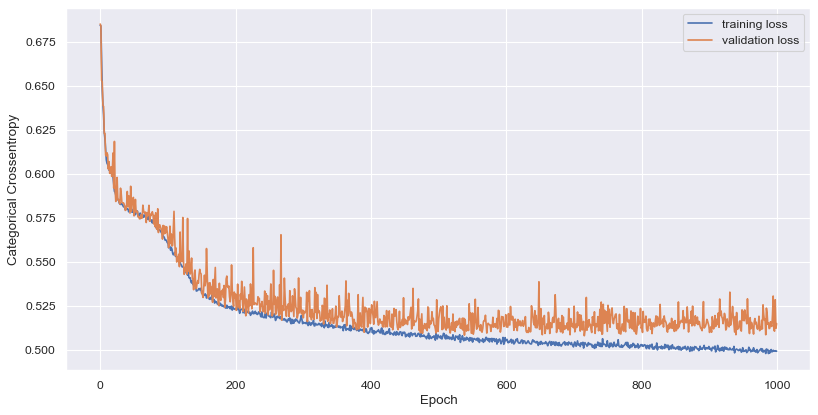

Training and validation accuracy on similar objects, 2 Grasps, 1000 epochs


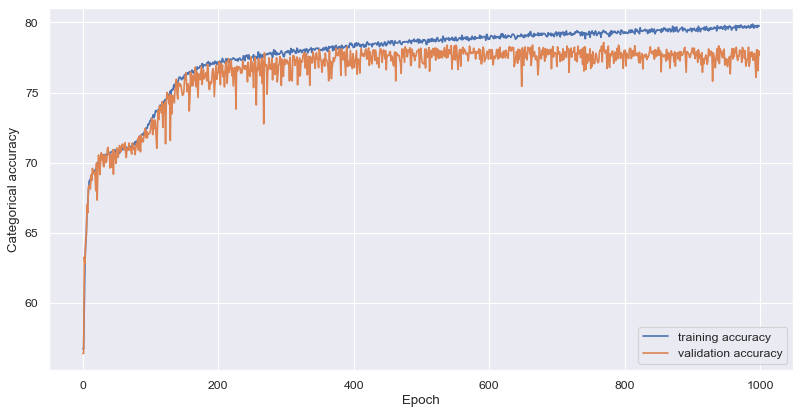

Highest validation accuracy achieved:  78.57282045286254


In [22]:
print("Training and validation loss on similar objects, 2 Grasps, 1000 epochs")
plot_losses(epochs_2_simi, training_losses_2_simi, validation_losses_2_simi, folder_2_simi, "")
print("Training and validation accuracy on similar objects, 2 Grasps, 1000 epochs")
plot_accuracies(epochs_2_simi, training_accs_2_simi, validation_accs_2_simi, folder_2_simi, "")
print("Highest validation accuracy achieved: ", max(validation_accs_2_simi))

### 5 Grasps

Training and validation loss on similar objects, 5 Grasps, 1000 epochs


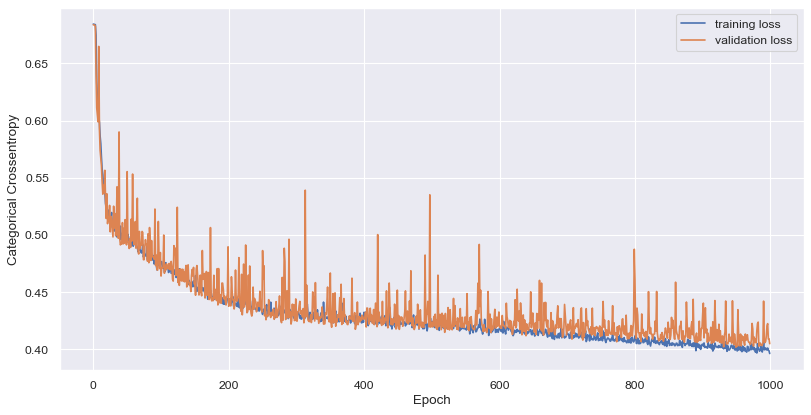

Training and validation accuracy on similar objects, 5 Grasps, 1000 epochs


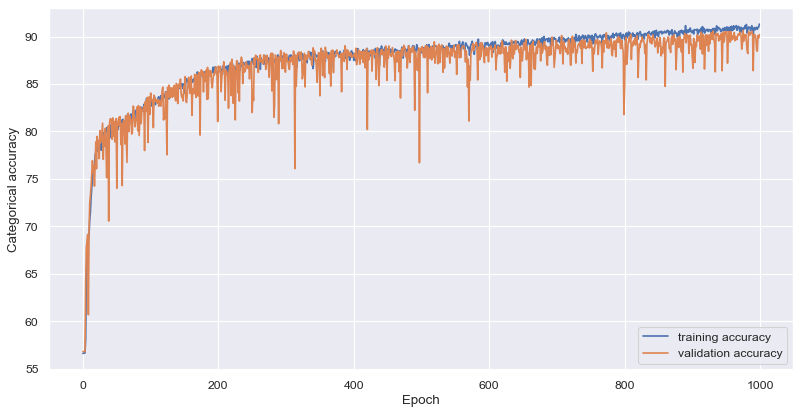

Highest validation accuracy achieved:  90.64692127825408


In [23]:
print("Training and validation loss on similar objects, 5 Grasps, 1000 epochs")
plot_losses(epochs_5_simi, training_losses_5_simi, validation_losses_5_simi, folder_5_simi, "")
print("Training and validation accuracy on similar objects, 5 Grasps, 1000 epochs")
plot_accuracies(epochs_5_simi, training_accs_5_simi, validation_accs_5_simi, folder_5_simi, "")
print("Highest validation accuracy achieved: ", max(validation_accs_5_simi))

### 10 Grasps 

Training and validation loss on similar objects, 10 Grasps, 1000 epochs


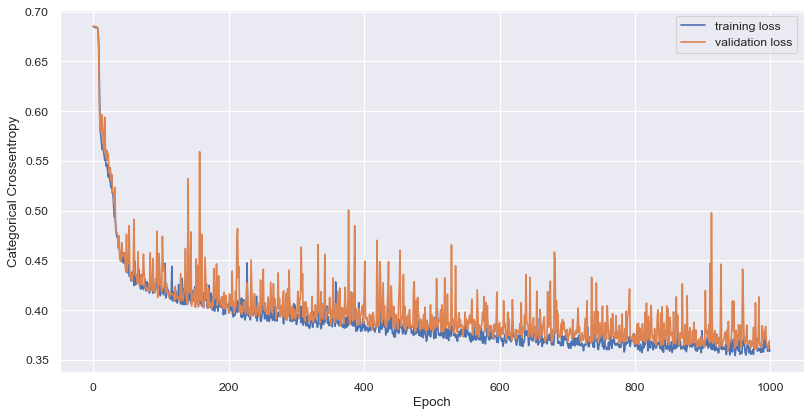

Training and validation accuracy on similar objects, 10 Grasps, 1000 epochs


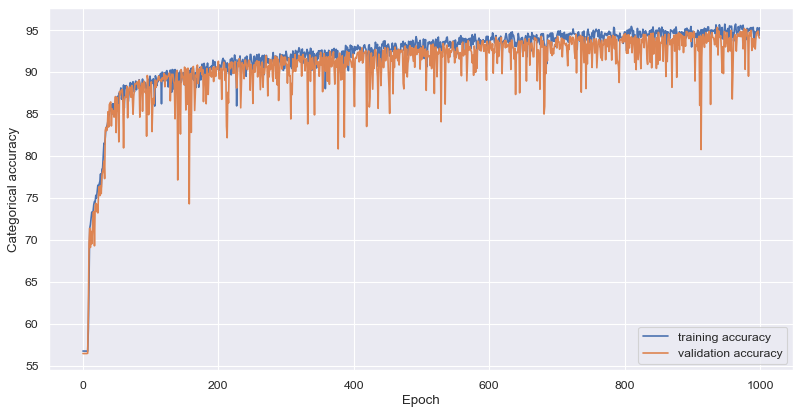

Highest validation accuracy achieved:  95.32346063912705


In [24]:
print("Training and validation loss on similar objects, 10 Grasps, 1000 epochs")
plot_losses(epochs_10_simi, training_losses_10_simi, validation_losses_10_simi, folder_10_simi, "")
print("Training and validation accuracy on similar objects, 10 Grasps, 1000 epochs")
plot_accuracies(epochs_10_simi, training_accs_10_simi, validation_accs_10_simi, folder_10_simi, "")
print("Highest validation accuracy achieved: ", max(validation_accs_10_simi))

# Comparing accuracies 

## Different objects 

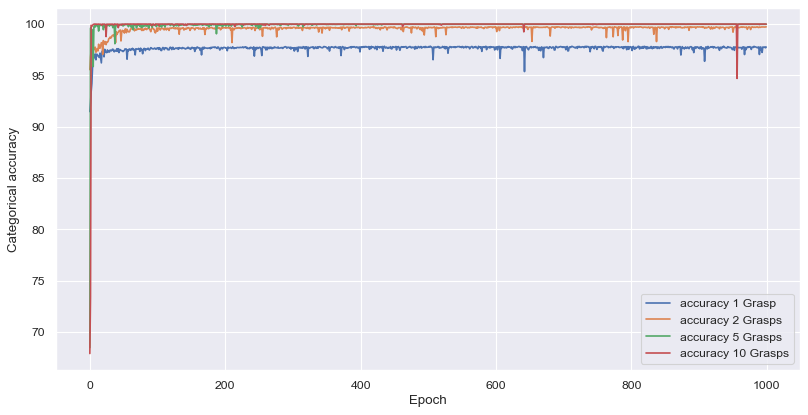

In [25]:
# Plotting the losses 
folder_plot = path.abspath(path.join(basepath, "..", "Figures/Training/Final_Data_Set"))
plt.figure(figsize=(12, 6), dpi=80)
plt.plot(epochs_1_diff, validation_accs_1_diff, label = "accuracy 1 Grasp")
plt.plot(epochs_2_diff, validation_accs_2_diff, label = "accuracy 2 Grasps")
plt.plot(epochs_5_diff, validation_accs_5_diff, label = "accuracy 5 Grasps")
plt.plot(epochs_10_diff, validation_accs_10_diff, label = "accuracy 10 Grasps")
plt.xlabel("Epoch")
plt.ylabel("Categorical accuracy")
plt.title("")
plt.legend(loc='lower right')
plt.savefig(folder_plot + "/Diff_obj_comparing_accuracies_" + str(len(epochs_1_diff)) + "_epochs.png")
plt.show()

## Similar objects

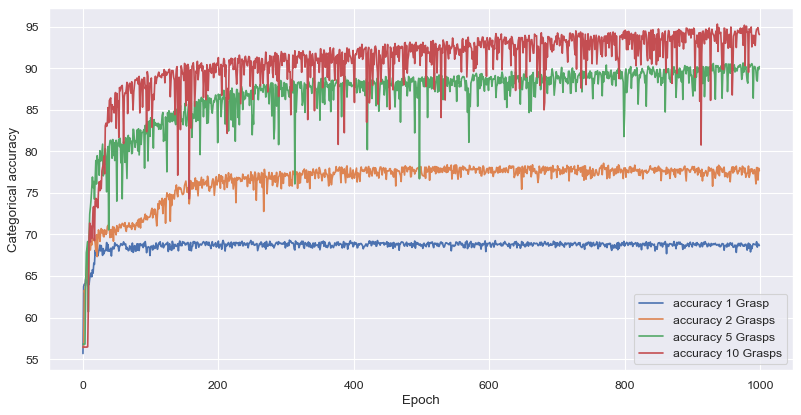

In [26]:
# Plotting the losses 
folder_plot = path.abspath(path.join(basepath, "..", "Figures/Training/Final_Data_Set"))
plt.figure(figsize=(12, 6), dpi=80)
plt.plot(epochs_1_simi, validation_accs_1_simi, label = "accuracy 1 Grasp")
plt.plot(epochs_2_simi, validation_accs_2_simi, label = "accuracy 2 Grasps")
plt.plot(epochs_5_simi, validation_accs_5_simi, label = "accuracy 5 Grasps")
plt.plot(epochs_10_simi, validation_accs_10_simi, label = "accuracy 10 Grasps")
plt.xlabel("Epoch")
plt.ylabel("Categorical accuracy")
plt.title("")
plt.legend(loc='lower right')
plt.savefig(folder_plot + "/Simi_obj_comparing_accuracies_" + str(len(epochs_1_diff)) + "_epochs.png")
plt.show()

## Appendix 

### Test: Using average layer instead of adding layer

Training and validation loss on similar objects, 5 Grasps, 500 epochs


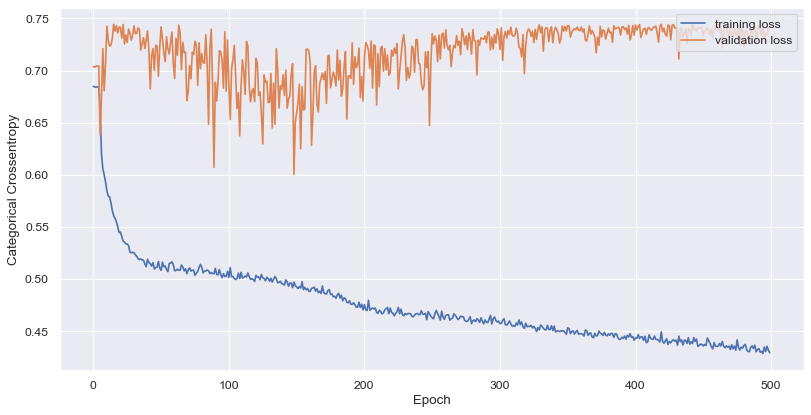

Training and validation accuracy on similar objects, 10 Grasps, 1000 epochs


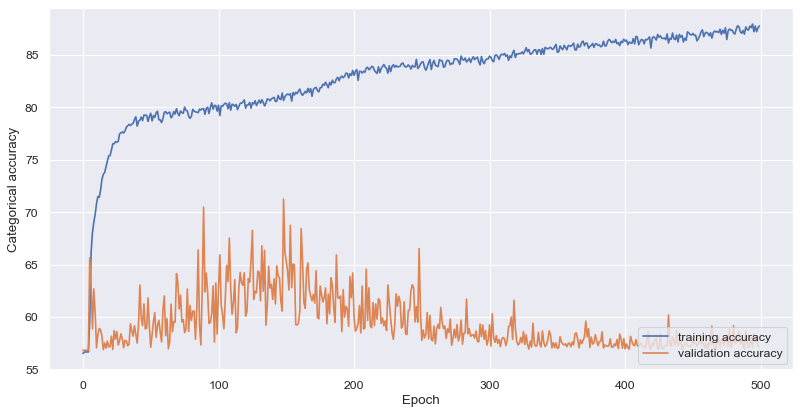

Highest validation accuracy achieved:  71.23928293063133


In [27]:
print("Training and validation loss on similar objects, 5 Grasps, 500 epochs")
plot_losses(epochs_5_average, training_losses_5_average, validation_losses_5_average, folder_5_average, "")
print("Training and validation accuracy on similar objects, 10 Grasps, 1000 epochs")
plot_accuracies(epochs_5_average, training_accs_5_average, validation_accs_5_average, folder_5_average, "")
print("Highest validation accuracy achieved: ", max(validation_accs_5_average))